<a href="https://colab.research.google.com/github/abdulnawab916/hw3MachineLearning/blob/main/HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Homework3
Please explain clearly and include your entire computational work when needed. Should you include any code, please make sure to provide additional comments to explain your solution.

Q1 (30 points) Hyper-parameter Tuning: Provide your coding for this exercise. Your code should run without error and the output should be correct based on your assumptions.
- Create a dummy dataset with 3 input features (X) and a numeric output variable (y). Your daatset should have 300 data points. The train:test split is 75:25.
- Standardize the input features.
- Construct a 3-layer neural network with 2 neurons in the hidden layer and one neuron in the output layer. Use Relu as the activation function in the hidden layer. Use Sigmoid as the activation function in the output layer.
- At this step, you are to use grid search to perform hyper-parameter tuning based on regularization and regularization parameter, momentum term, and batch size. For each paramter, try 2 different values. Refer to "lec11-grid-search.ipynb" as a reference. You are not allowed to copy-paste the code to solve this assignment. Just use it to learn what to do. Use SGD as your optimization technique.
- In your code, report which subset of hyper-parameters give the best model. Then using the best hyper-parameters that you reported, visualize the MSE loss on train and test data over multiple epochs (the number of epochs depends on model convergence).

Note: Hyperparameter tuning takes a lot of time to execute. Make sure that you choose the appropriate number of each hyperparameter (preferably 3 of each), and that you allocate enough time to execute your code.

<ipython-input-1-c1af3dcf51ef>:33: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasRegressor(build_fn=create_model, verbose=0)
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


Best: -12379.158854 using {'batch_size': 40, 'epochs': 100, 'l1': 0.01, 'momentum': 0.9, 'regularization': 'l1'}


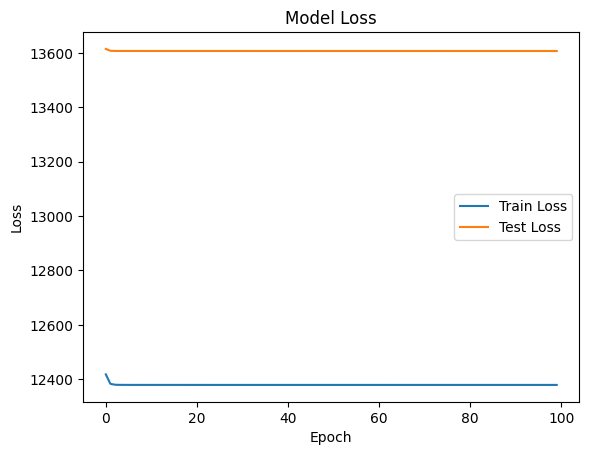

In [ ]:
import numpy as np
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from tensorflow.keras.optimizers import SGD
from matplotlib import pyplot as plt

# Generate a dummy dataset
X, y = make_regression(n_samples=300, n_features=3, noise=0.1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Function to create model, required for KerasRegressor
def create_model(regularization='l2', l1=0.01, momentum=0.9, batch_size=32):
    # create model
    model = Sequential([
        Dense(2, input_dim=3, activation='relu', kernel_regularizer=regularization),
        Dense(1, activation='sigmoid')
    ])
    # Compile model
    optimizer = SGD(learning_rate=0.01, momentum=momentum)
    model.compile(loss='mean_squared_error', optimizer=optimizer)
    return model

# Wrap the model using KerasRegressor
model = KerasRegressor(build_fn=create_model, verbose=0)

# Define the grid search parameters
param_grid = {
    'batch_size': [20, 40],
    'epochs': [50, 100],
    'regularization': ['l1', 'l2'],
    'l1': [0.01, 0.005],
    'momentum': [0.0, 0.9]
}

# Create Grid Search
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train, y_train)

# Summarize results
best_params = grid_result.best_params_
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

# Training the best model to visualize loss
best_model = create_model(
    regularization=best_params['regularization'],
    l1=best_params['l1'],
    momentum=best_params['momentum'],
    batch_size=best_params['batch_size']
)
history = best_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=best_params['epochs'], batch_size=best_params['batch_size'], verbose=0)

# Visualizing the MSE loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()


# REFERENCES #
# Library and Function References:
# 1. NumPy (numpy as np): Used for large, multi-dimensional arrays and matrices.
# 2. Scikit-learn:
# make_regression(): Generates a random regression problem.
# train_test_split(): Splits data into random train and test subsets.
# GridSearchCV: Searches over specified parameter values for an estimator.
# StandardScaler: Standardizes features by removing the mean and scaling to unit variance.
# 3. TensorFlow/Keras:
# Sequential: Linear stack of layers.
# Dense: Regular densely-connected NN layer.
# KerasRegressor: Keras implementation for scikit-learn regressor API.
# SGD: Stochastic Gradient Descent optimizer.
# 4. Matplotlib (pyplot): Used for 2D plotting, capable of producing publication-quality figures.

Q2- (30 points) Given the information below, use Naïve Bayes to determine whether File 6 belongs to class label "Spam" or "Ham" given its features. Answering following questions clearly and accurately. Provide your computational work.
![Generated Dataset](tbl1.jpg)
- What are the prior probabilities P(Spam), P(Ham)?
- Compute the required conditional probabilitues corresponding to the parameters of the model by filling the table below.
![Generated Dataset](tbl2.jpg)
- What is the probability of File 6 being a Spam? What is the probability of File 6 being a Ham? What can you conclude about the category of File 6? Justify your answer.

Answer for Question 2:

I have attached files to my github as my response for question 2.


They are in PDF form.

Q3- (6 points) A patient with a positive test wants to know how probable it is to have flu. Find the probability given the information below and provide your computational work.
Prior probability: P(not flu)=0.15
Likelihood: P(positive│ flu)=0.85
Evidence: P(negative)=0.25


for this problem, we have to use the baye's theorem:
$$
P(\text{flu} \mid \text{positive}) = \frac{P(\text{positive} \mid \text{flu}) \times P(\text{flu})}{P(\text{positive})}
$$

here are some of the given:
(There was some algebraic manipulation that had to be done in order to obtain certain values)
- $P(\text{flu}) = 0.85$
- $P(\text{positive} \mid \text{flu}) = 0.85$
- $P(\text{positive}) = 1 - P(\text{negative}) = 1 - 0.25 = 0.75$

now we plug the values into the equation that we have set up:
$$
P(\text{flu} \mid \text{positive}) = \frac{0.85 \times 0.85}{0.75} = \frac{0.7225}{0.75} \approx 0.9633
$$

now, we know that the probability that a patient has the flu given that they tested positive is approximately $0.9633$, or $96.33\%$!

Q4- (8 points) Imagine you are tasked with developing a binary classification model to classify emails as either "spam" or "not spam" based on their content. The observations in the dataset cover several aspects listed in the following table:


![Generated Dataset](tbl3.jpg)

You have two different approaches in mind: Naive Bayes classification and Bayesian networks. Answer the following question in the context of this email classification (as “spam” or “not spam”):
Discuss the assumptions in Naïve Bayes and Bayesian Network algorithms, as well as advantages and disadvantages of using Naïve Bayes and Bayesian Network classification. Your answer should address the following points:
-	What aspects of the problem make Naïve Bayes classification suitable or unsuitable?
-	Similarly, analyze the suitability of using Bayesian networks for the email classification problem and indicate what unique characteristics of Bayesian networks make them a potentially good or bad choice for this task?
-	Discuss these methods in terms of their computational efficiency and classification accuracy, considering the features listed in the above table.
Include your answer in a table with the following layout:
![Generated Dataset](tbl4.jpg)


For the answer to question 4, we also have the files attached as a PDF.

Q5- (6 points) Given the following probability table, build a Naïve Bayes classifier using the Discriminant function. Can this classifier accurately predict if a patient is healthy/not-healthy based on the Test results? (e.g., can a positive test result indicate with high confidence that a patient has flu? How about a negative test result?) Show your mathematical work with proper explanation. Please note that P(Healthy) = 0.25.
![Generated Dataset](tbl5.jpg)

Question 5 Answer:
Given this following table, we can determine if the classifier can accurately predict if the patient is healthy or not healthy in the following way.

I have the following mathematical work attached in a seperate folder.



For the response to most of these questions, the computational work
is show seperately.

Q6- (15 points) Consider the table of measured data given below:
![Generated Dataset](pic1.png)

The goal is to build a decision tree model to predict the outcome y using the two features $x_1$,$x_2$, where each feature $x_1$,$x_2$ can take one of the three values: a, b, c.

hint:
- $log_2 (0.4) = -1.32 $                   
- $log_2 (0.6) = -0.73 $
- $log_2 (0.5) = -1 $                        
- $log_2 (0.75) = -0.41 $
- $log_2 (0.25) = -2 $


Answer the following questions:

- Compute the entropy of the target variable y (round to 3 decimal places). Include all your assumptions. Entropy(y) = ?
- Compute the information gain for $x_1$ and $x_2$ attributes and show your work. Based on the computed values, indicate which attribute ($x_1$ or $x_2$) should be selected first in the split strategy during model construction. Show your computation and use the provided contingency table below, which is obtained from the information in the dataset in the table above.

![Generated Dataset](cont.jpg)



Answer to question 6:

A sneak peak into the solutions that I had are the following...

We have computed the values for Entropy(Y), where Y can be either 0 or be 1, and we also show which feature we would select first.

In this particular case, we select the feature X2, since it has a higher IG (information gain)

the computational work is attached in this folder!


Q7- (5 points) Explain how Random Forest algorithm controls the number of features to find the best split?

Q7 Answer:
The Random Forest algorithm controls the number of features to find the best split by incorporating a hyperparameter in it. This hyperparameter can either have a value of P/3, or sqrt(P). This value is essentially the number of features at each tree. So for one tree, you would have a randomized value for the input features. And then at another tree, you would have another value that would be representative of this.

Q8-(Optional Question- 8 extra points based on the completeness of the answer) Based on the optional document "Lec12-MultivariateDistributions.pdf", describe how conditional probabilities are computed in training a Bayesian Network model when the random variables are continuous. Provide an example.  